In [3]:
#Importing the needed libraries 
import pandas as pd
import os 
import csv
import numpy as np
import matplotlib.pyplot as plt
 # Files to load (Remember to change these)
housingprice = pd.read_csv("C:/Users/n76934/price.csv")

#Questions asked:  How Charlotte compares in rent costs compared to some of the other biggest cities in America.  Why is everyone moving to North Carolina recently?  Is it really that much cheaper for someone looking to rent? 
# Data I used was a rent Zillow rent price index by city.

# * Data Cleanup & Exploration

#   * Describe the exploration and cleanup process
#   * Discuss insights you had while exploring the data that you didn't anticipate
#   * Discuss any problems that arose after exploring the data, and how you resolved them
#   * Present and discuss interesting figures developed during exploration, ideally with the help of Jupyter Notebook

# * Data Analysis

#   * Discuss the steps you took to analyze the data and answer each question you asked in your proposal
#   * Present and discuss interesting figures developed during analysis, ideally with the help of Jupyter Notebook

# * Discussion

#   * Discuss your findings. Did you find what you expected to find? If not, why not? What inferences or general conclusions can you draw from your analysis?

# * Post Mortem

#   * Discuss any difficulties that arose, and how you dealt with them
#   * Discuss any additional questions that came up, but which you didn't have time to answer: What would you research next, if you had two more weeks?

In [4]:
housingprice

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212
5,40326,Phoenix,Phoenix,Maricopa,AZ,6,1087.0,1080.0,1071.0,1067.0,...,1228,1236,1240,1240,1238,1238,1239,1241,1244,1247
6,18959,Las Vegas,Las Vegas,Clark,NV,7,1188.0,1183.0,1178.0,1177.0,...,1222,1225,1227,1227,1227,1228,1230,1234,1237,1239
7,6915,San Antonio,San Antonio,Bexar,TX,8,1057.0,1043.0,1037.0,1032.0,...,1244,1245,1245,1241,1236,1234,1235,1239,1245,1250
8,54296,San Diego,San Diego,San Diego,CA,9,2070.0,2059.0,2043.0,2030.0,...,2414,2428,2438,2442,2441,2442,2449,2457,2465,2469
9,38128,Dallas,Dallas-Fort Worth,Dallas,TX,10,1114.0,1135.0,1156.0,1159.0,...,1338,1347,1353,1358,1364,1370,1377,1385,1389,1391


In [5]:
#Locating the needed cities in Pandas
Charlotte_rent_data = housingprice.loc[housingprice['City'] == 'Charlotte']
NewYork_rent_data = housingprice.loc[housingprice['City'] == 'New York']
LosAngeles_rent_data = housingprice.loc[housingprice['City'] == 'Los Angeles']
Chicago_rent_data = housingprice.loc[housingprice['City'] == 'Chicago']
Houston_rent_data = housingprice.loc[housingprice['City'] == 'Houston']

In [6]:
Charlotte_rent_data


,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
19,24043,Charlotte,Charlotte,Mecklenburg,NC,20,1024.0,1022.0,1024.0,1026.0,...,1276,1283,1289,1289,1287,1285,1285,1286,1290,1294
6591,4056,Charlotte,Nashville,Dickson,TN,6592,887.0,885.0,886.0,887.0,...,943,955,963,960,956,955,959,962,965,969


In [7]:
#Dropping the non needed "Charlotte" and "Houston" row.
Charlotte_rent_data  = Charlotte_rent_data.drop([6591])


In [8]:
Houston_rent_data

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
10262,11987,Houston,La Crosse,Houston,MN,10263,1000.0,1008.0,1004.0,1000.0,...,1225,1233,1241,1237,1226,1220,1226,1234,1241,1248
11776,55828,Houston,Dover,Kent,DE,11777,1205.0,1208.0,1214.0,1223.0,...,1256,1242,1222,1210,1210,1219,1229,1230,1222,1211


In [9]:
Houston_rent_data  = Houston_rent_data.drop([10262])


In [10]:
Houston_rent_data = Houston_rent_data.drop([11776])

In [11]:
Charlotte_rent_data = Charlotte_rent_data.transpose()

In [12]:
NewYork_rent_data = NewYork_rent_data.transpose()

In [13]:
LosAngeles_rent_data = LosAngeles_rent_data.transpose()

In [14]:
Chicago_rent_data = Chicago_rent_data.transpose()

In [15]:
Houston_rent_data = Houston_rent_data.transpose()

In [16]:
#Charlotte_rent_data.plot
NewdataCLT = Charlotte_rent_data.drop(['City Code','City','Metro','County','State','Population Rank'])
NewdataNYC = NewYork_rent_data.drop(['City Code','City','Metro','County','State','Population Rank'])
NewdataLA = LosAngeles_rent_data.drop(['City Code','City','Metro','County','State','Population Rank'])
NewdataCHI = Chicago_rent_data.drop(['City Code','City','Metro','County','State','Population Rank'])
NewdataHOU = Houston_rent_data.drop(['City Code','City','Metro','County','State','Population Rank'])


In [17]:
rent_costCLT = NewdataCLT.rename(columns={19: 'rent_costCLT'})
rent_costNYC = NewdataNYC.rename(columns={0: 'rent_costNYC'})
rent_costLA = NewdataLA.rename(columns={1: 'rent_costLA'})
rent_costCHI = NewdataCHI.rename(columns={2: 'rent_costCHI'})
rent_costHOU = NewdataHOU.rename(columns={3: 'rent_costHOU'})

In [18]:
rent_costHOU

,rent_costHOU
November 2010,1198
December 2010,1199
January 2011,1199
February 2011,1200
March 2011,1203
April 2011,1205
May 2011,1204
June 2011,1199
July 2011,1194
August 2011,1190


In [19]:
first_join = pd.concat([rent_costCLT, rent_costNYC], axis=1)

Combined_data = pd.concat([first_join, rent_costLA], axis=1)

Combined_datasecond = pd.concat([Combined_data, rent_costHOU], axis=1)

Final_data = pd.concat([Combined_datasecond, rent_costCHI], axis=1)

In [20]:
Final_data

,rent_costCLT,rent_costNYC,rent_costLA,rent_costHOU,rent_costCHI
November 2010,1024,NaN,2184,1198,1563
December 2010,1022,NaN,2184,1199,1555
January 2011,1024,NaN,2183,1199,1547
February 2011,1026,NaN,2188,1200,1537
March 2011,1029,NaN,2189,1203,1526
April 2011,1037,NaN,2189,1205,1517
May 2011,1045,NaN,2188,1204,1507
June 2011,1053,NaN,2191,1199,1497
July 2011,1060,NaN,2189,1194,1493
August 2011,1066,NaN,2186,1190,1491


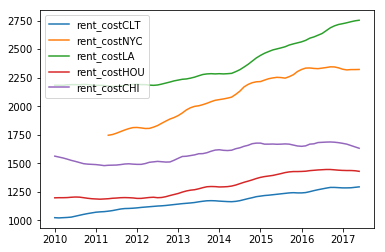

In [32]:

ax1 = Final_data.plot()

x1 = [0,1,2,3,4,5,6,7,8]
xtickslabels = ['2009','2010','2011','2012','2013','2014','2015','2016','2017']


ax1.set_xticklabels(xtickslabels)

plt.savefig("C:/Users/n76934/Fig1Project.png")

